# Author:  R. SRI SKANDHA MOORTHY


# TASK - Prediction using Unsupervised ML
 

# The  Sparks Foundations


# GRIPMar2021







 #### Using Iris dataset, predict the optimum number of clusters  and represent it visually. 


In [1]:
# Import required libraries

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.cluster





In [2]:
#Import  Iris data set and check the Info of Dataset



data=pd.read_csv("P:\sparks Internship\Iris.csv")

data.Species.value_counts()





Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

###  DATA VISUALIZATION

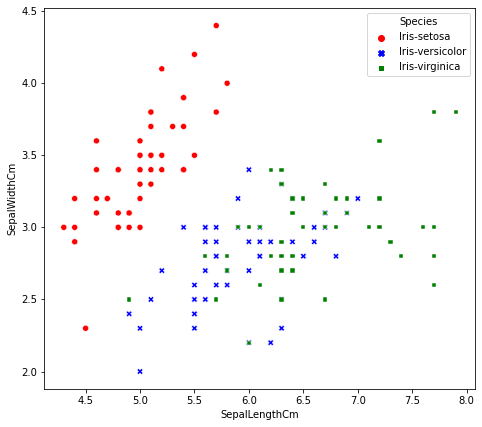

In [3]:


fig ,ax=plt.subplots(figsize=(17,7))
plt.subplot(1,2,1)
sb.scatterplot(x=data.SepalLengthCm , y= data.SepalWidthCm, hue=data. Species ,style=data. Species ,palette=["red","blue","green"]);




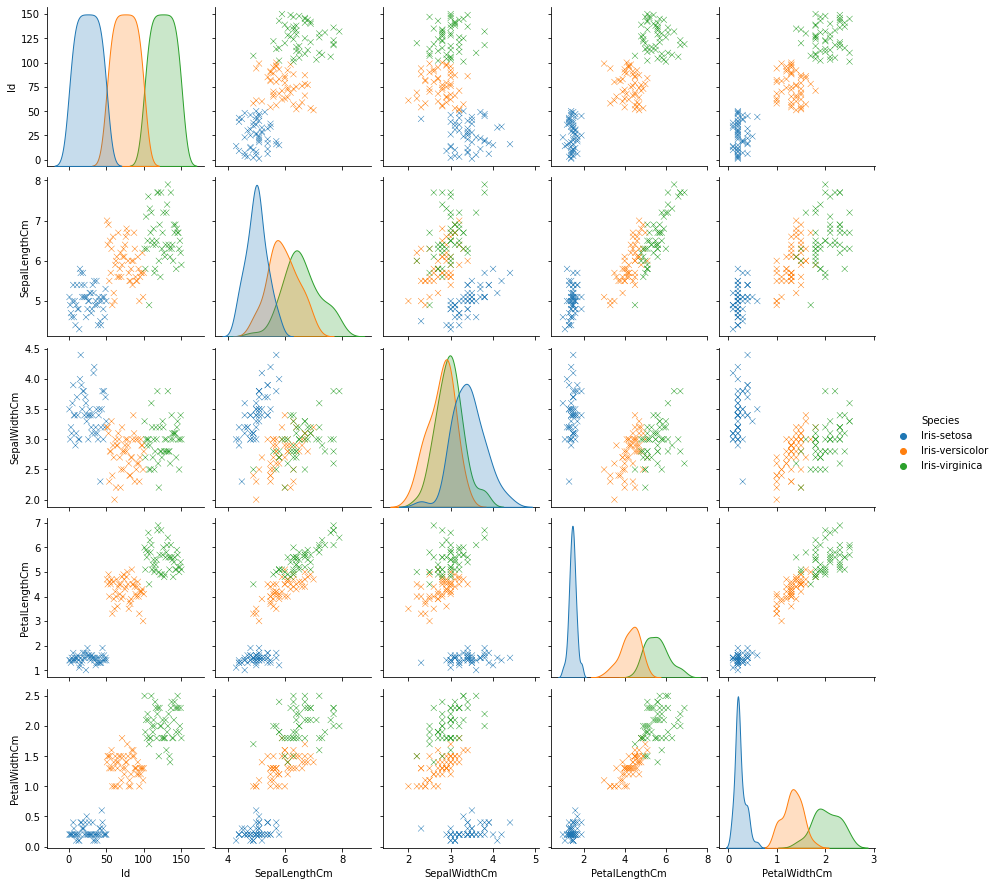

In [6]:
#Visulaisations of the dataset


sb.pairplot(data, hue="Species", markers='x')
plt.show()





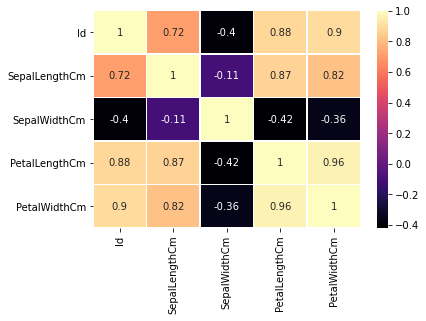

In [8]:

# Heat map

sb.heatmap(data.corr() ,linewidth=0.5 ,cmap='magma', annot=True)
plt.show()

## Finding the Optimum clusters using "Elbow Method"

In [9]:
# K- Means determing the optimum clusters

data.drop("Id",inplace=True,axis=1)
data.drop("Species",inplace=True,axis=1)



x=data.iloc[: ,[0,1,2,3]].values
x



K_range=range(1,12)
cluster_sumof_square=[]

for K in K_range:
    KM=KMeans(n_clusters=K)
    KM=KM.fit(data)
    cluster_sumof_square.append(KM.inertia_)

C:\Users\Sri Skandha Moorthy\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


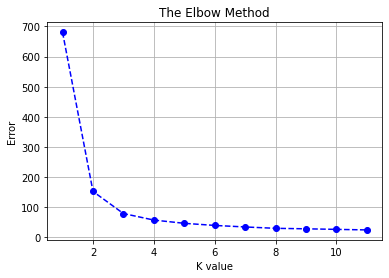

In [10]:
#Plotting using elbow method

plt.plot(range(1,12),cluster_sumof_square,  'go--',color='blue')
plt.title("The Elbow Method")
plt.xlabel("K value")
plt.ylabel("Error")
plt.grid()
plt.show()

**Here the Elbow occurs at 3 So the Optimum number of clusters is 3**

## Applying K-means algorithm to fit the optimum clusters.

In [11]:
#Applying K Means

model=KMeans(n_clusters=3, init= 'k-means++', max_iter=300 , n_init=10 , random_state=0)
prediction=model.fit_predict(data)
prediction



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

**Plotting the clusters

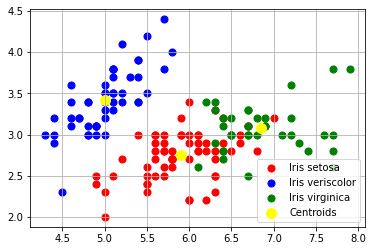

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [12]:
#Plotting the Clusters

plt.scatter(x[prediction==0,0], x[prediction ==0,1], s=50 , c="red", label="Iris setosa")
plt.scatter(x[prediction==1,0], x[prediction ==1,1], s=50 , c="blue", label="Iris veriscolor")
plt.scatter(x[prediction==2,0], x[prediction ==2,1], s=50 , c="green", label="Iris virginica")


#Plotting centroids

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s=100 , c="Yellow",label="Centroids")
plt.legend()
plt.grid()
plt.show()

model.cluster_centers_


**The clusters are plotted with different colors and centroids of clusters is in "Yellow".** 

#### Thank You